## Neural Networks (Deep Learning)

A family of algorithms known as *neural networks* has recently seen a revival under the name “deep learning.” While deep learning shows great promise in many machine learning applications, deep learning algorithms are often tailored very carefully to a specific use case. 

Here, we will only discuss some relatively simple methods, namely *multilayer perceptrons* for classification and regression, that can serve as a starting point for more involved deep learning methods. Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks.

### The Neural Network Model

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

Remember that the prediction by a linear regressor is given as:

    ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

In plain English, ŷ is a weighted sum of the input features x[0] to x[p], weighted by the learned coefficients w[0] to w[p]. We could visualize this graphically as shown.

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

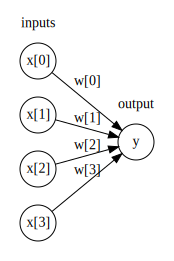

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

In this visualization of logistic regression:
- each node on the left represents an input features
- the connecting lines represent the learned coefficients
- the node on the right represents, the output, which is the weighted sum of the inputs

In an *MLP*, this process of computing weighted sums is repeated multiple times, first computing *hidden units* that represent an intermediate processing step, which are again combined using weighted sums to yield the final result.

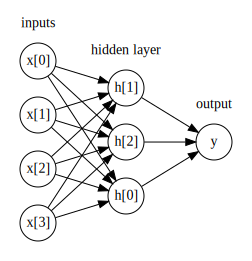

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

This model has a lot more coefficients (also called *weights*) to learn: there is one between every input and every hidden unit (which make up the hidden layer), and one between every unit in the hidden layer and the output.

Computing a series of weighted sums is mathematically the same as computing just one weighted sum, so to make this model truly more powerful than a linear model, we need one extra trick. After computing a weighted sum for each hidden unit, a nonlinear function is applied to the result — usually the rectifying nonlinearity (also known as rectified linear unit or *relu*) or the tangens hyperbolicus (*tanh*). 

The result of this function is then used in the weighted sum that computes the output, ŷ. The two functions are visualized here. The *relu* cuts off values below zero, while *tanh* saturates to –1 for low input values and +1 for high input values. Either nonlinear function allows the neural network to learn much more complicated functions than a linear model could.

Text(0, 0.5, 'relu(x), tanh(x)')

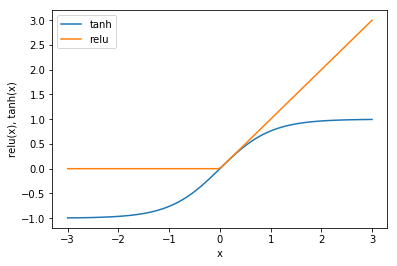

In [4]:
line = np.linspace(-3, 3, 100)

plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")

plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

For the small neural network pictured here, the full formula for computing ŷ in the case of regression would be (when using a tanh nonlinearity):

    h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[0])
    h[1] = tanh(w[0, 1] * x[0] + w[1, 1] * x[1] + w[2, 1] * x[2] + w[3, 1] * x[3] + b[1])
    h[2] = tanh(w[0, 2] * x[0] + w[1, 2] * x[1] + w[2, 2] * x[2] + w[3, 2] * x[3] + b[2])
    ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b

Here: 
- *w* are the weights between the input x and the hidden layer h
- *v* are the weights between the hidden layer h and the output ŷ. 

The weights v and w are learned from data, x are the input features, ŷ is the computed output, and h are intermediate computations. 

An important parameter that needs to be set by the user is the number of nodes in the hidden layer. This can be as small as 10 for very small or simple datasets and as big as 10,000 for very complex data. It is also possible to add additional hidden layers, as shown here:

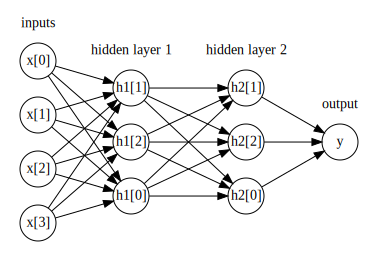

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

Having large neural networks made up of many of these layers of computation is what inspired the term *deep learning*.

### Tuning Neural Networks

Now, we'll look into the workings of the MLP by applying the *MLPClassifier* to the *two_moons* dataset we used earlier.

Text(0, 0.5, 'Feature 1')

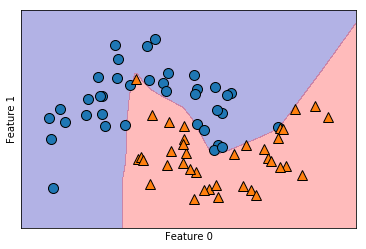

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

As we can see, the neural network learned a very nonlinear but relatively smooth decision boundary.

By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset.  We can reduce the number (which reduces the complexity of the model) and still get a good result.

Text(0, 0.5, 'Feature 1')

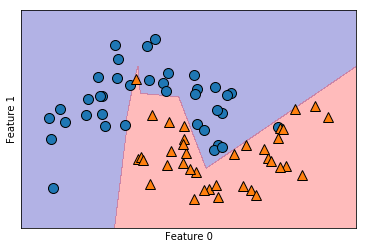

In [7]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

With only 10 hidden units, the decision boundary looks somewhat more ragged.  The default nonlinearity is *relu*.  With a single hidden layer, this means that the decision function will be made up of 10 straight line segments.

If we want a smoother decision boundary, we could add more hidden units, add a second hidden layer, or use the *tanh* nonlinearity.

Text(0, 0.5, 'Feature 1')

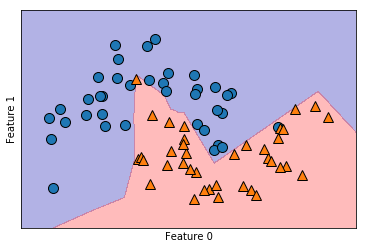

In [8]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

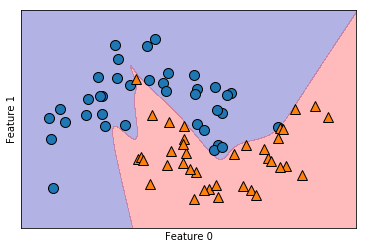

In [9]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Finally, we can also control the complexity of a neural network by using an L2 penalty to shrink the weights toward zero, as we did in ridge regression and the linear classifiers. The parameter for this in the MLPClassifier is *alpha* (as in the linear regression models), and it’s set to a very low value (little regularization) by default. 

Here, we show the effect of different values of *alpha* on the two_moons dataset, using two hidden layers of 10 or 100 units each.

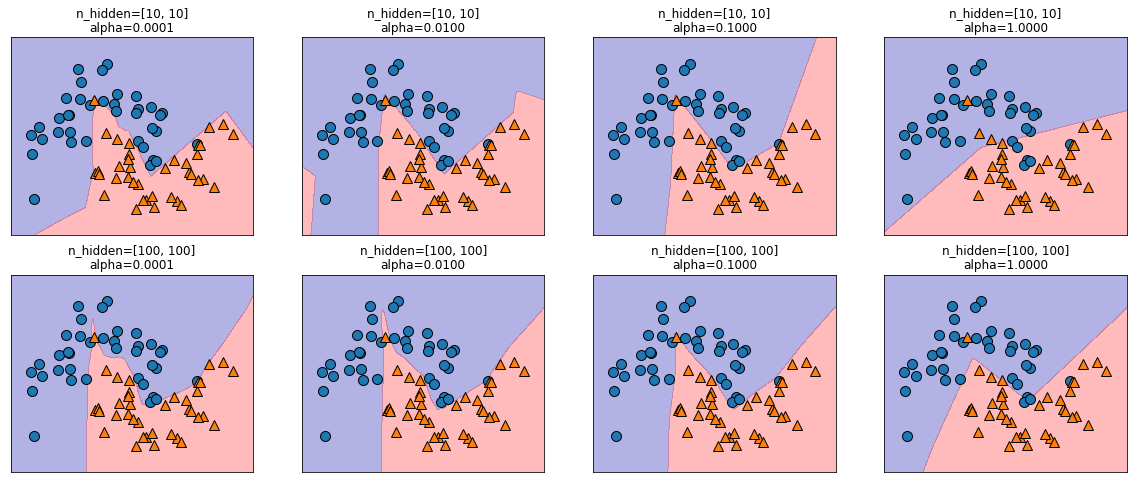

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        
        mlp.fit(X_train, y_train)
        
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

As we can see, there are many ways to control the complexity of a neural network: the number of hidden layers, the number of units in each hidden layer, and the regularization (alpha). There are actually even more, which we won’t go into here.

An important property of neural networks is that their weights are set randomly before learning is started, and this random initialization affects the model that is learned. That means that even when using exactly the same parameters, we can obtain very different models when using different random seeds. If the networks are large, and their complexity is chosen properly, this should not affect accuracy too much, but it is worth keeping in mind (particularly for smaller networks).

Here, we show plots of several models, all learned with the same settings of the parameters.

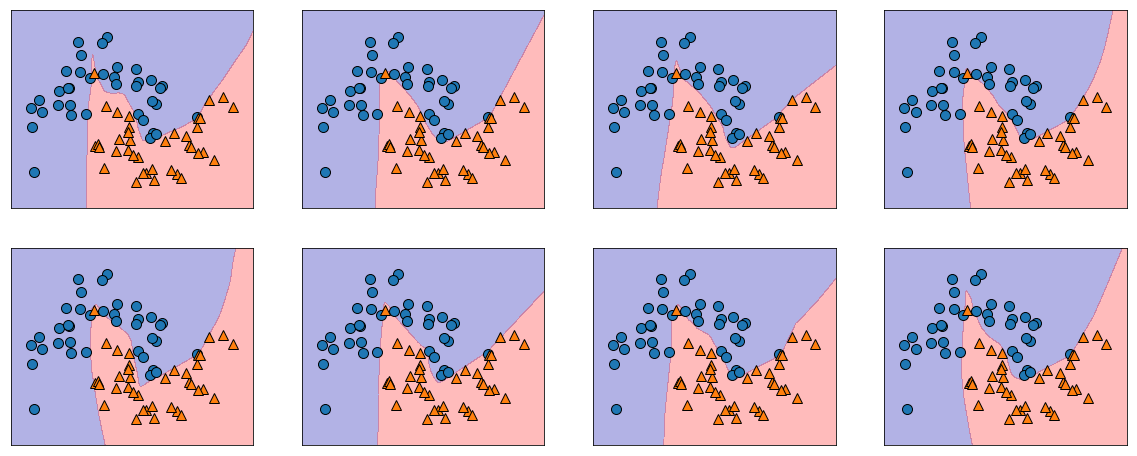

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

### Classifying the Breast Cancer Dataset

To get a better understanding of neural networks on real-world data, let's apply the *MLPClassifier* to the Breast Cancer dataset.  We start with the default parameters:

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("cancer data per-feature mazima:\n{}".format(cancer.data.max(axis=0)))

cancer data per-feature mazima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [15]:
# Classify the dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


The accuracy of the MLP is quite good, but not as good as the other models. As in the earlier SVC example, this is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements. Again, we will do this by hand here, but we’ll introduce the StandardScaler to do this automatically in Chapter 3.

In [17]:
# Compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# Compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# Subtract the mean, and scale by inverse standard deviation
# Afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# Use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


The results are much better after scaling, and already quite competitive. We got a warning from the model, though, that tells us that the maximum number of iterations has been reached. This is part of the *adam* algorithm for learning the model, and tells us that we should increase the number of iterations.

In [18]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Increasing the number of iterations only increased the training set performance, not the generalization performance. Still, the model is performing quite well. 

As there is some gap between the training and the test performance, we might try to decrease the model’s complexity to get better generalization performance. Here, we choose to increase the *alpha* parameter (quite aggressively, from 0.0001 to 1) to add stronger regularization of the weights.

In [19]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


This leads to a performance on par with the best models so far.

While it is possible to analyze what a neural network has learned, this is usually much trickier than analyzing a linear model or a tree-based model. One way to inspect what was learned is to look at the weights in the model.

For the Breast Cancer dataset, this might be a bit hard to understand. The following plot shows the weights that were learned connecting the input to the first hidden layer. The rows in this plot correspond to the 30 input features, while the columns correspond to the 100 hidden units. Light colors represent large positive values, while dark colors represent negative values.

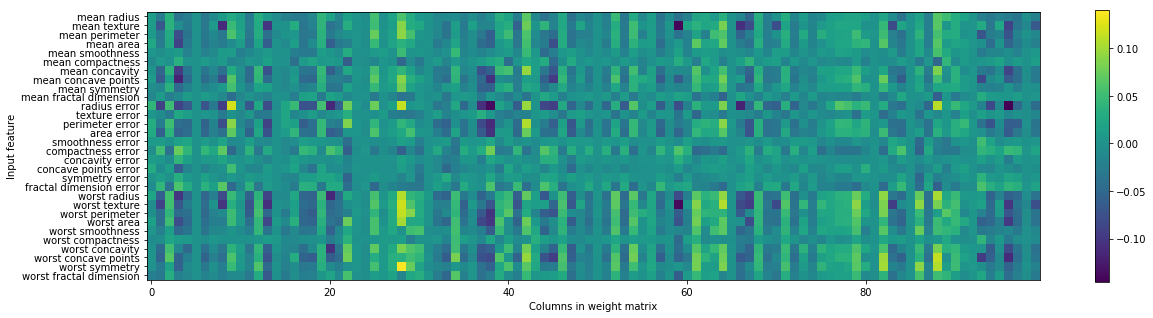

In [20]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

One possible inference we can make is that features that have very small weights for all of the hidden units are “less important” to the model. We can see that “mean smoothness” and “mean compactness,” in addition to the features found between “smoothness error” and “fractal dimension error,” have relatively low weights compared to other features. This could mean that these are less important features or possibly that we didn’t represent them in a way that the neural network could use.

We could also visualize the weights connecting the hidden layer to the output layer, but those are even harder to interpret.

While the *MLPClassifier* and *MLPRegressor* provide easy-to-use interfaces for the most common neural network architectures, they only capture a small subset of what is possible with neural networks. 

There are larger and more flexible models beyond scikit-learn into the fantastic deep learning libraries out there. For Python users, the most well-established are *keras*, *lasagna*, and *tensor-flow*. lasagna builds on the theano library, while keras can use either tensor-flow or theano. These libraries provide a much more flexible interface to build neural networks and track the rapid progress in deep learning research. All of the popular deep learning libraries also allow the use of high-performance graphics processing units (GPUs), which scikit-learn does not support. Using GPUs allows us to accelerate computations by factors of 10x to 100x, and they are essential for applying deep learning methods to large-scale datasets.

### Strengths, Weaknesses, and Parameters

Neural networks have reemerged as state-of-the-art models in many applications of machine learning. One of their main advantages is that they are able to capture information contained in large amounts of data and build incredibly complex models. Given enough computation time, data, and careful tuning of the parameters, neural networks often beat other machine learning algorithms (for classification and regression tasks).

This brings us to the downsides. Neural networks—particularly the large and powerful ones—often take a long time to train. They also require careful preprocessing of the data, as we saw here. Similarly to SVMs, they work best with “homogeneous” data, where all the features have similar meanings. For data that has very different kinds of features, tree-based models might work better. Tuning neural network parameters is also an art unto itself. In our experiments, we barely scratched the surface of possible ways to adjust neural network models and how to train them.

#### Estimating complexity in neural networks

The most important parameters are the number of layers and the number of hidden units per layer. You should start with one or two hidden layers, and possibly expand from there. The number of nodes per hidden layer is often similar to the number of input features, but rarely higher than in the low to mid-thousands.

A helpful measure when thinking about the model complexity of a neural network is the number of weights or coefficients that are learned. If you have a binary classification dataset with 100 features, and you have 100 hidden units, then there are 100 * 100 = 10,000 weights between the input and the first hidden layer. There are also 100 * 1 = 100 weights between the hidden layer and the output layer, for a total of around 10,100 weights. 

If you add a second hidden layer with 100 hidden units, there will be another 100 * 100 = 10,000 weights from the first hidden layer to the second hidden layer, resulting in a total of 20,100 weights. If instead you use one layer with 1,000 hidden units, you are learning 100 * 1,000 = 100,000 weights from the input to the hidden layer and 1,000 * 1 weights from the hidden layer to the output layer, for a total of 101,000. If you add a second hidden layer you add 1,000 * 1,000 = 1,000,000 weights, for a whopping total of 1,101,000—50 times larger than the model with two hidden layers of size 100.

A common way to adjust parameters in a neural network is to first create a network that is large enough to overfit, making sure that the task can actually be learned by the network. Then, once you know the training data can be learned, either shrink the network or increase alpha to add regularization, which will improve generalization performance.

In our experiments, we focused mostly on the definition of the model: the number of layers and nodes per layer, the regularization, and the nonlinearity. These define the model we want to learn. There is also the question of how to learn the model, or the algorithm that is used for learning the parameters, which is set using the algorithm parameter.

There are two easy-to-use choices for algorithm. The default is *adam*, which works well in most situations but is quite sensitive to the scaling of the data (so it is important to always scale your data to 0 mean and unit variance). 

The other one is *lbfgs*, which is quite robust but might take a long time on larger models or larger datasets. 

There is also the more advanced *sgd* option, which is what many deep learning researchers use. The 'sgd' option comes with many additional parameters that need to be tuned for best results. You can find all of these parameters and their definitions in the user guide. When starting to work with MLPs, we recommend sticking to 'adam' and 'lbfgs'.